<a href="https://colab.research.google.com/github/Nanda-0101/Oryza-Sativa-Prediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
df = pd.read_csv('/content/Data_Tanaman_Padi_Sumatera_version_1.csv')
df

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.00,323589.00,1627.0,82.00,26.06
1,Aceh,1994,1299699.00,329041.00,1521.0,82.12,26.92
2,Aceh,1995,1382905.00,339253.00,1476.0,82.72,26.27
3,Aceh,1996,1419128.00,348223.00,1557.0,83.00,26.08
4,Aceh,1997,1368074.00,337561.00,1339.0,82.46,26.31
...,...,...,...,...,...,...,...
219,Lampung,2016,3831923.00,390799.00,2317.6,79.40,26.45
220,Lampung,2017,4090654.00,396559.00,1825.1,77.04,26.36
221,Lampung,2018,2488641.91,511940.93,1385.8,76.05,25.50
222,Lampung,2019,2164089.33,464103.42,1706.4,78.03,27.23


In [ ]:
print("Statistik Deskriptif:")
print(df.describe())

Statistik Deskriptif:
             Tahun      Produksi     Luas Panen  Curah hujan  Kelembapan  \
count   224.000000  2.240000e+02     224.000000   224.000000  224.000000   
mean   2006.500000  1.679701e+06  374349.966920  2452.490759   80.948705   
std       8.095838  1.161387e+06  232751.161987  1031.972625    4.878680   
min    1993.000000  4.293800e+04   63142.040000   222.500000   54.200000   
25%    1999.750000  5.488570e+05  146919.500000  1703.525000   78.975000   
50%    2006.500000  1.667773e+06  373551.500000  2315.700000   82.375000   
75%    2013.250000  2.436851e+06  514570.250000  3039.700000   84.000000   
max    2020.000000  4.881089e+06  872737.000000  5522.000000   90.600000   

       Suhu rata-rata  
count      224.000000  
mean        26.801964  
std          1.197041  
min         22.190000  
25%         26.177500  
50%         26.730000  
75%         27.200000  
max         29.850000  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def exploratory_data_analysis(data_path):
    """
    Fungsi untuk melakukan analisis eksplorasi data (EDA)
    """
    # Load data
    df = pd.read_csv(data_path)

    print("=== INFORMASI DATA ===")
    print(df.info())

    print("\n=== STATISTIK DESKRIPTIF ===")
    print(df.describe())

    print("\n=== CEK NILAI NULL ===")
    print(df.isnull().sum())

    # Visualisasi data
    plt.figure(figsize=(12, 6))

    # Histogram untuk variabel numerik
    print("\n=== HISTOGRAM VARIABEL NUMERIK ===")
    df.hist(bins=20, figsize=(12, 8))
    plt.tight_layout()
    plt.savefig('histograms.png')
    plt.close()

    # Boxplot untuk mendeteksi outlier
    print("\n=== BOXPLOT VARIABEL NUMERIK ===")
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.savefig(f'boxplot_{col}.png')
        plt.close()

    # Matriks korelasi
    if len(numeric_cols) > 1:
        print("\n=== MATRIKS KORELASI ===")
        corr_matrix = df[numeric_cols].corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
        plt.title('Matriks Korelasi')
        plt.savefig('correlation_matrix.png')
        plt.close()

    return df

if __name__ == "__main__":
    # Contoh penggunaan
    data = exploratory_data_analysis('/content/Data_Tanaman_Padi_Sumatera_version_1.csv')

=== INFORMASI DATA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB
None

=== STATISTIK DESKRIPTIF ===
             Tahun      Produksi     Luas Panen  Curah hujan  Kelembapan  \
count   224.000000  2.240000e+02     224.000000   224.000000  224.000000   
mean   2006.500000  1.679701e+06  374349.966920  2452.490759   80.948705   
std       8.095838  1.161387e+06  232751.161987  1031.972625    4.878680   
min    1993.000000  4.293800e+04   63142.040000   222.500000   54.

<Figure size 1200x600 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

def statistical_analysis(df):
    """
    Fungsi untuk melakukan analisis statistik
    """
    results = {}

    # Uji normalitas untuk variabel numerik
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    print("=== UJI NORMALITAS (SHAPIRO-WILK) ===")
    for col in numeric_cols:
        stat, p = stats.shapiro(df[col].dropna())
        print(f"{col}: Statistics={stat:.3f}, p-value={p:.3f}")
        results[f"normalitas_{col}"] = {'statistic': stat, 'p-value': p}

    # Uji hipotesis (contoh: uji-t untuk dua kelompok)
    if 'group' in df.columns and len(df['group'].unique()) == 2:
        print("\n=== UJI-T INDEPENDEN ===")
        group1 = df[df['group'] == df['group'].unique()[0]][numeric_cols[0]]
        group2 = df[df['group'] == df['group'].unique()[1]][numeric_cols[0]]
        t_stat, p_val = stats.ttest_ind(group1, group2)
        print(f"Perbandingan {numeric_cols[0]} antar kelompok:")
        print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
        results['uji_t'] = {'t-statistic': t_stat, 'p-value': p_val}

    # Analisis ANOVA (jika ada variabel kategori dengan >2 level)
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) > 0 and len(numeric_cols) > 0:
        for cat_col in categorical_cols:
            if len(df[cat_col].unique()) > 2:
                print(f"\n=== ANOVA UNTUK {cat_col} ===")
                model = ols(f'{numeric_cols[0]} ~ C({cat_col})', data=df).fit()
                anova_table = sm.stats.anova_lm(model, typ=2)
                print(anova_table)
                results[f'anova_{cat_col}'] = anova_table

    # Analisis regresi linier
    if len(numeric_cols) >= 2:
        print("\n=== ANALISIS REGRESI LINIER ===")
        X = df[numeric_cols[1]]  # Variabel independen
        y = df[numeric_cols[0]]  # Variabel dependen
        X = sm.add_constant(X)  # Menambahkan konstanta
        model = sm.OLS(y, X).fit()
        print(model.summary())
        results['regresi_linier'] = model.summary()

    return results

if __name__ == "__main__":
    # Contoh penggunaan
    data = pd.read_csv('/content/Data_Tanaman_Padi_Sumatera_version_1.csv')
    stats_results = statistical_analysis(data)

=== UJI NORMALITAS (SHAPIRO-WILK) ===
Tahun: Statistics=0.952, p-value=0.000
Produksi: Statistics=0.920, p-value=0.000
Luas Panen: Statistics=0.919, p-value=0.000
Curah hujan: Statistics=0.967, p-value=0.000
Kelembapan: Statistics=0.888, p-value=0.000
Suhu rata-rata: Statistics=0.942, p-value=0.000

=== ANOVA UNTUK Provinsi ===
                   sum_sq     df             F  PR(>F)
C(Provinsi)  2.430489e-22    7.0  5.131223e-25     1.0
Residual     1.461600e+04  216.0           NaN     NaN

=== ANALISIS REGRESI LINIER ===
                            OLS Regression Results                            
Dep. Variable:                  Tahun   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     7.651
Date:                Wed, 21 May 2025   Prob (F-statistic):            0.00615
Time:                        12:29:35   Log-Likelihood:                -782.0

In [ ]:
df['log_Produksi'] = np.log1p(df['Produksi'])
df['sqrt_LuasPanen'] = np.sqrt(df['Luas Panen'])

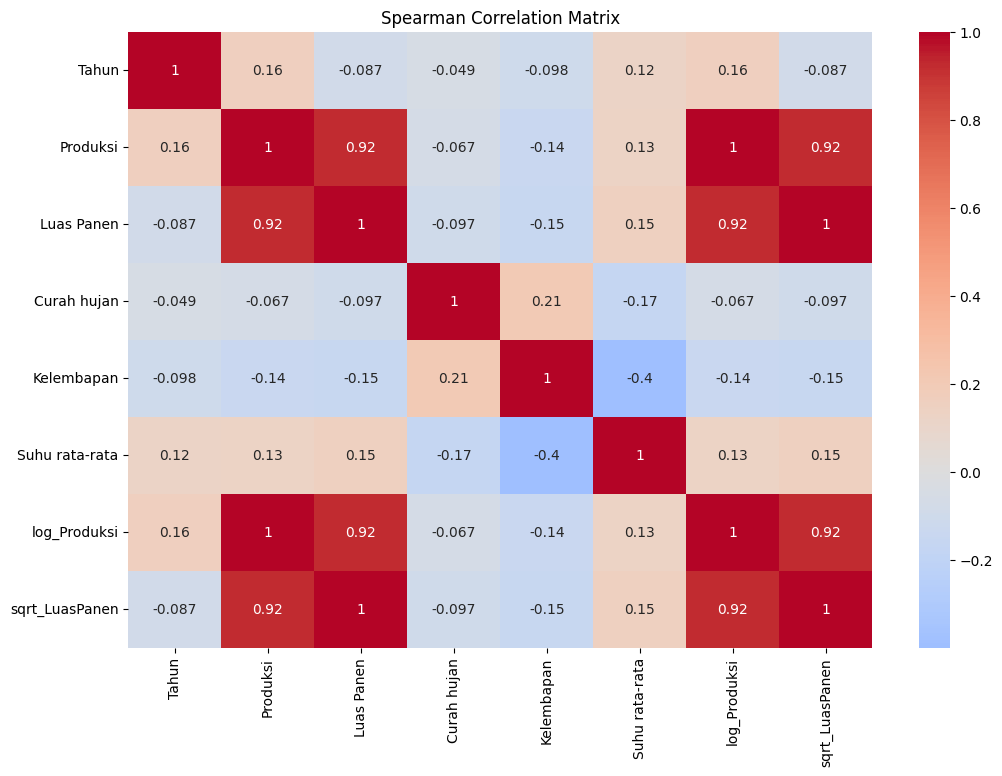

In [ ]:
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr(method='spearman')  # Spearman untuk non-parametric
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Correlation Matrix')
plt.show()

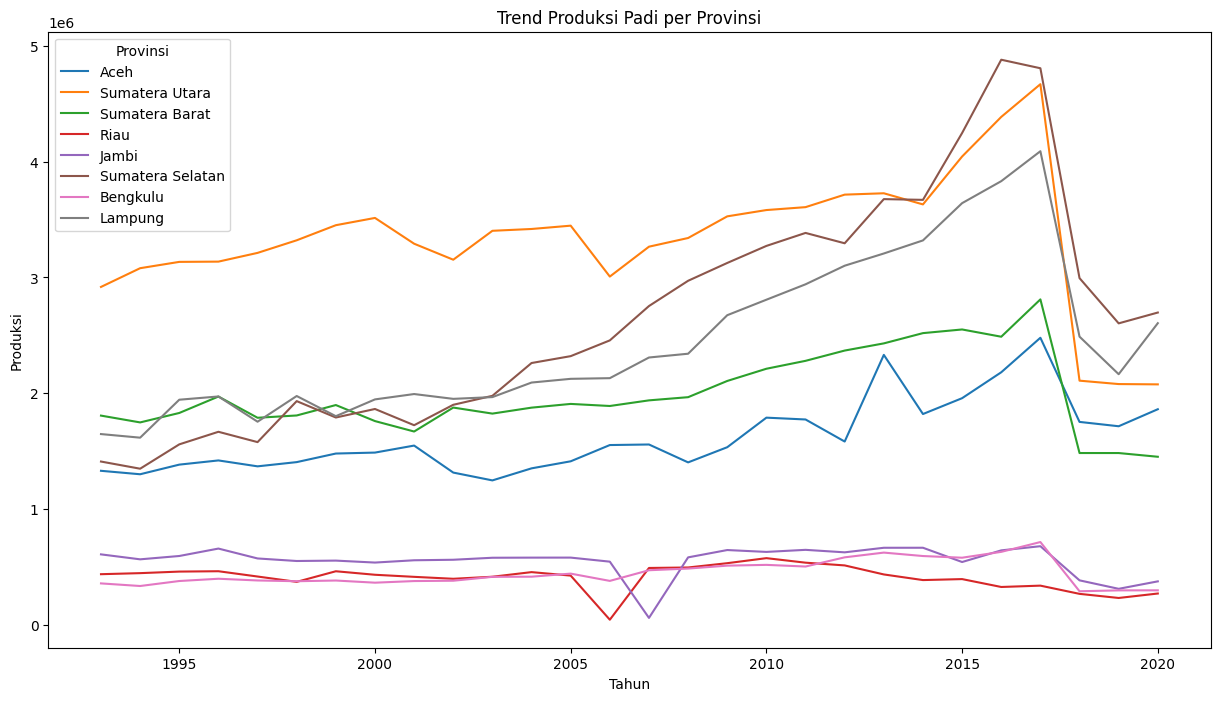

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=df, x='Tahun', y='Produksi', hue='Provinsi')
plt.title('Trend Produksi Padi per Provinsi')
plt.show()


In [ ]:
# Model alternatif dengan regularisasi
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Persiapan data
X = df[['Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata']]
y = df['Produksi']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, y)

Ridge()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Prediksi dan evaluasi
y_pred = ridge.predict(X_scaled)
print("R2 Score:", r2_score(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

# Cross-validation
cv_scores = cross_val_score(ridge, X_scaled, y, cv=5, scoring='r2')
print("CV R2 Scores:", cv_scores)
print("Mean CV R2:", np.mean(cv_scores))

R2 Score: 0.825637419071175
RMSE: 483873.8749872198
CV R2 Scores: [ 0.79765052  0.52849389 -1.85276748  0.8112937   0.77284121]
Mean CV R2: 0.21150236923465063


In [ ]:
from sklearn.model_selection import GridSearchCV

# Tuning parameter alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_scaled, y)

print("Best alpha:", grid_search.best_params_)
print("Best R2:", grid_search.best_score_)

# Gunakan model terbaik
best_ridge = grid_search.best_estimator_

Best alpha: {'alpha': 0.001}
Best R2: 0.24292522820218676


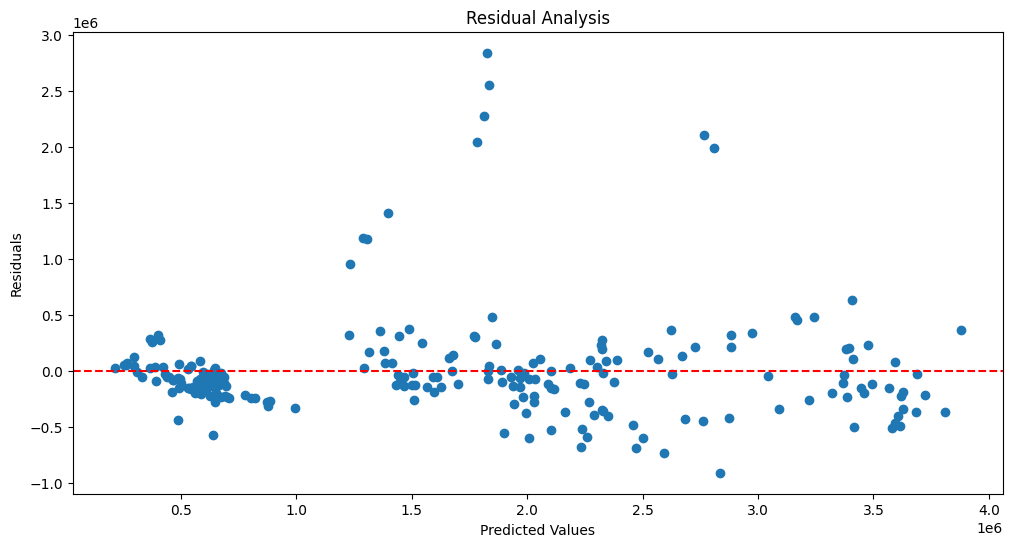

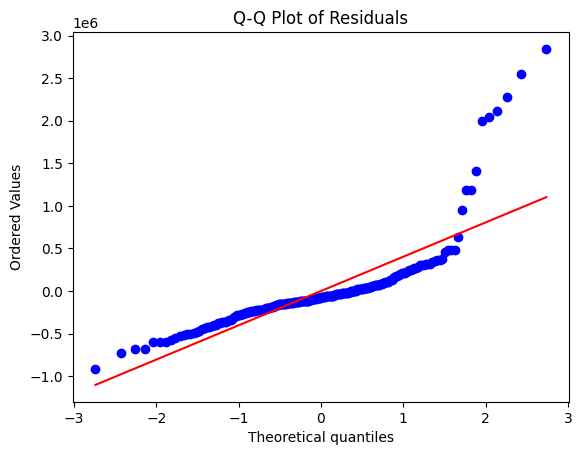

In [ ]:
# Analisis residual
residuals = y - best_ridge.predict(X_scaled)

plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

# Q-Q plot residual
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

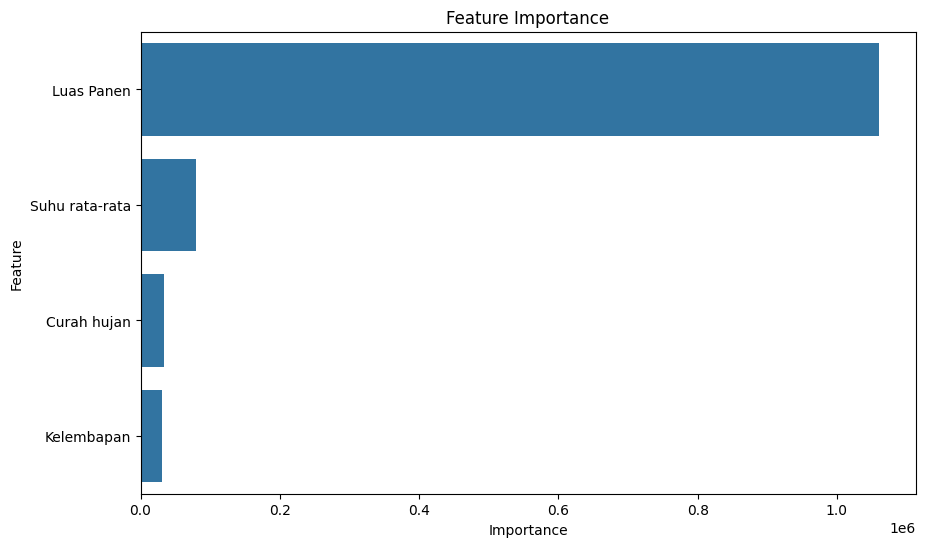

In [ ]:
# Feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(best_ridge.coef_)
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('Feature Importance')
plt.show()

RF R2 Score: 0.9771771360236553


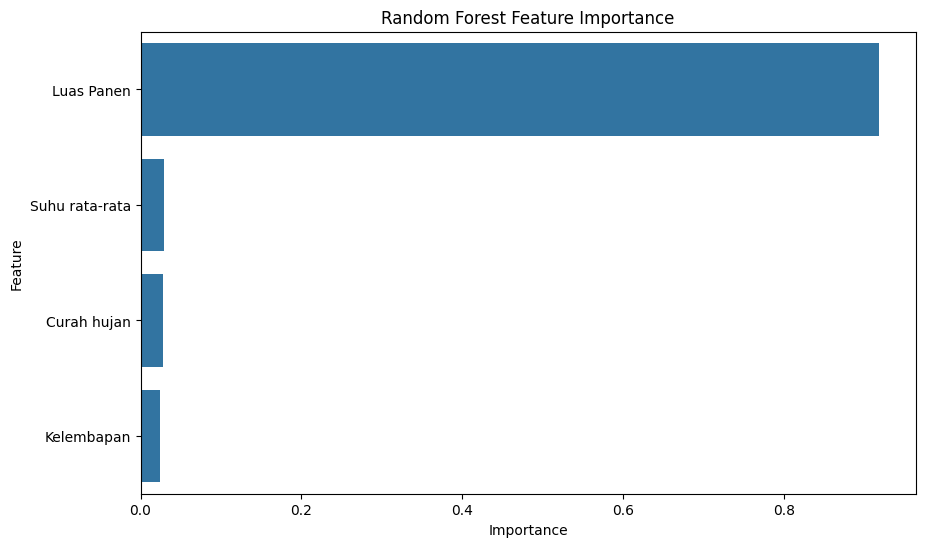

In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

# Evaluasi
print("RF R2 Score:", r2_score(y, rf.predict(X_scaled)))

# Feature importance RF
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance)
plt.title('Random Forest Feature Importance')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Gunakan data yang sudah ditransformasi
X = df[['Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata']]
y = df['Produksi']  # Atau gunakan y = df['log_Produksi'] jika menggunakan transformasi log

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Latih model dengan data training
best_ridge = Ridge(alpha=1.0)  # Gunakan alpha terbaik dari grid search
best_ridge.fit(X_train_scaled, y_train)

# Prediksi pada data test
y_pred = best_ridge.predict(X_test_scaled)

# Jika menggunakan transformasi log, konversi kembali ke skala asli
# y_pred = np.expm1(y_pred)  # Untuk inverse log transform
# y_test = np.expm1(y_test)  # Jika y_train menggunakan log

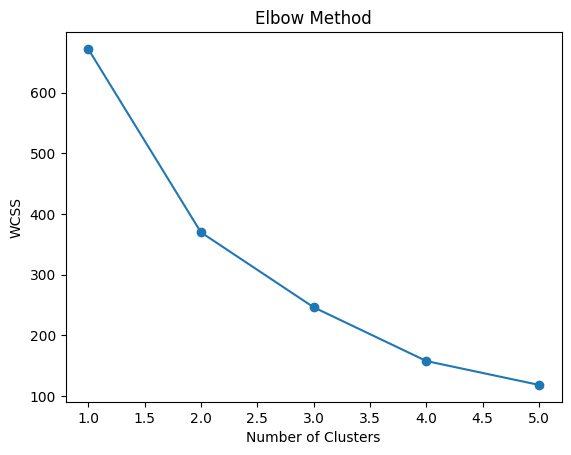

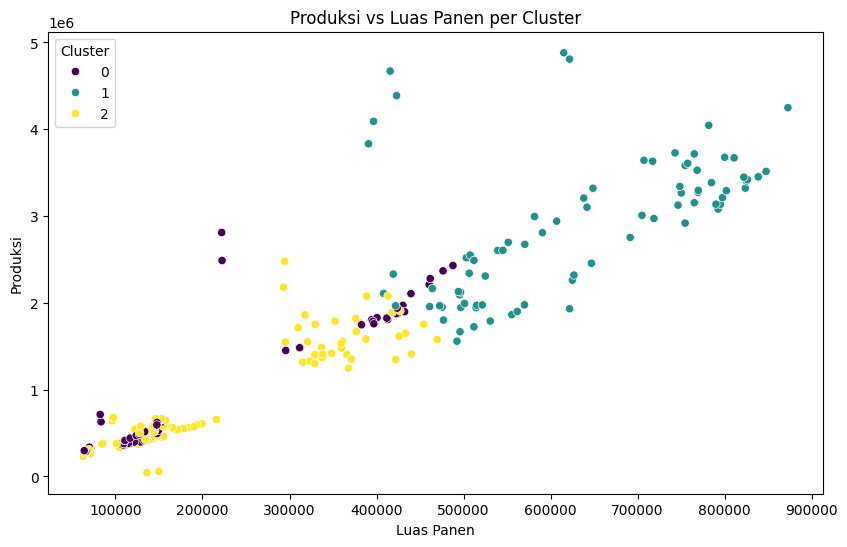

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalisasi data untuk clustering
scaler_cluster = StandardScaler()
X_cluster = scaler_cluster.fit_transform(df[['Luas Panen', 'Curah hujan', 'Produksi']])

# Optimal number of clusters dengan Elbow Method
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 6), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Pilih 3 cluster berdasarkan elbow plot
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)

# Visualisasi cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Luas Panen', y='Produksi', hue='Cluster', palette='viridis')
plt.title('Produksi vs Luas Panen per Cluster')
plt.show()

In [ ]:
# Contoh data baru (sesuaikan dengan format yang dibutuhkan)
new_data = pd.DataFrame({
    'Luas Panen': [400000],
    'Curah hujan': [2500],
    'Kelembapan': [80],
    'Suhu rata-rata': [27]
})

# Preprocessing data baru
new_data_scaled = scaler.transform(new_data)

# Prediksi
prediction = best_ridge.predict(new_data_scaled)
print("Prediksi Produksi:", prediction[0])

# Jika menggunakan transformasi log:
# print("Prediksi Produksi:", np.expm1(prediction)[0])

Prediksi Produksi: 1812261.6411831079


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

Prediksi Time Series: 22    2.110448e+06
23    2.145390e+06
24    2.180326e+06
25    2.215257e+06
26    2.250183e+06
27    2.285103e+06
Name: predicted_mean, dtype: float64


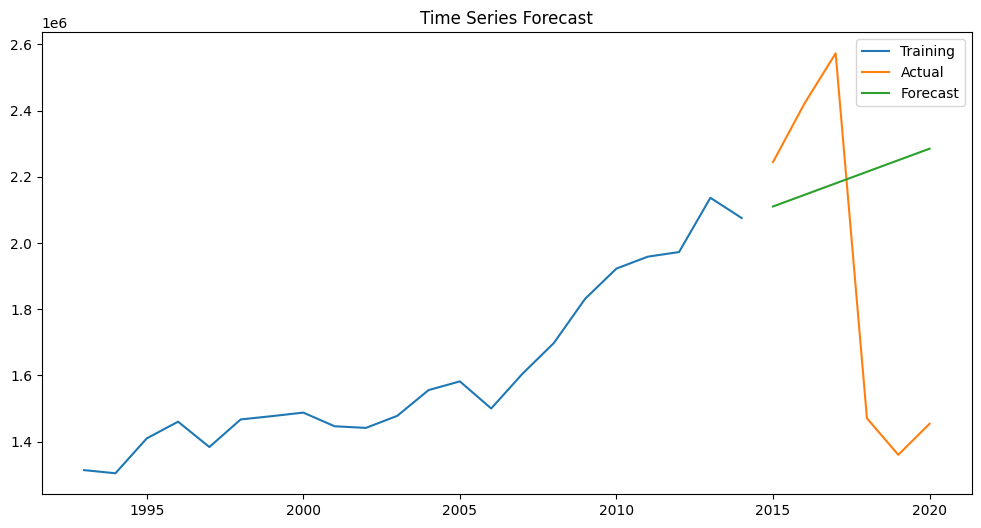

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Siapkan data time series (contoh: produksi tahunan agregat)
ts_data = df.groupby('Tahun')['Produksi'].mean()

# Train test split time series
train_size = int(len(ts_data) * 0.8)
train, test = ts_data[:train_size], ts_data[train_size:]

# Model ARIMA
model = ARIMA(train, order=(1, 1, 1))  # Sesuaikan parameter
model_fit = model.fit()

# Prediksi
forecast = model_fit.forecast(steps=len(test))
print("Prediksi Time Series:", forecast)

# Plot hasil
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.title('Time Series Forecast')
plt.show()

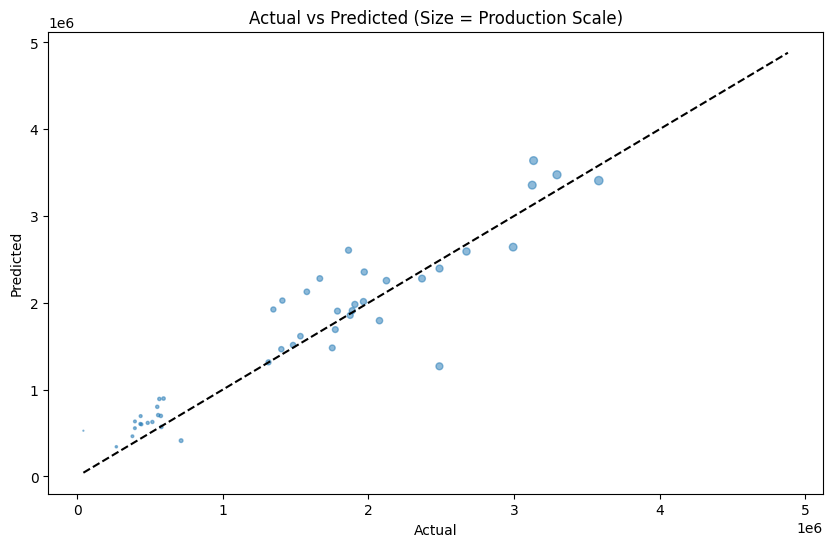

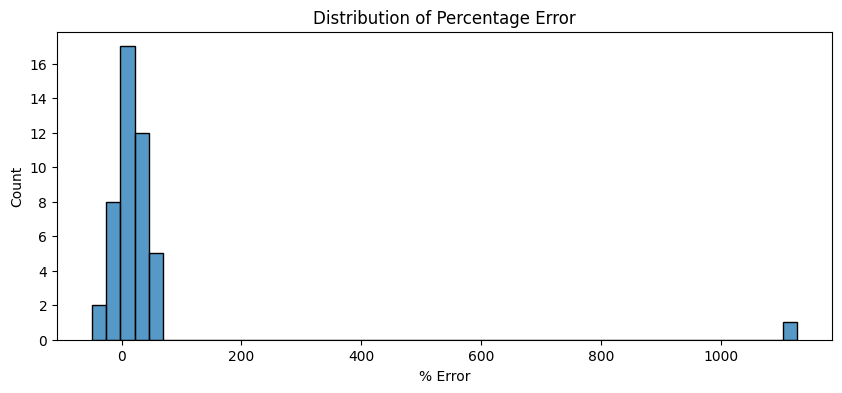

In [ ]:
# 1. Plot actual vs predicted dengan ukuran titik berdasarkan nilai aktual
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, s=y_test/100000, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.title('Actual vs Predicted (Size = Production Scale)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# 2. Plot distribusi error relatif
error = (y_pred - y_test)/y_test
plt.figure(figsize=(10,4))
sns.histplot(error*100, bins=50)
plt.title('Distribution of Percentage Error')
plt.xlabel('% Error')
plt.show()

In [ ]:
# Deteksi outlier dengan IQR
Q1 = df['Produksi'].quantile(0.25)
Q3 = df['Produksi'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Produksi'] < (Q1 - 1.5*IQR)) | (df['Produksi'] > (Q3 + 1.5*IQR))]
print(f"Jumlah outlier: {len(outliers)}")

# Opsi penanganan:
# a. Winsorizing (mengganti outlier dengan nilai threshold)
from scipy.stats.mstats import winsorize
df['Produksi_winsorized'] = winsorize(df['Produksi'], limits=[0.05, 0.05])

# b. Transformasi log (sudah dilakukan)
# c. Hapus outlier (jika jumlah sedikit)
df_clean = df[~df.index.isin(outliers.index)]

Jumlah outlier: 0


In [ ]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train_scaled, y_train)

# Evaluasi
y_pred_gb = gb_model.predict(X_test_scaled)
print(f"MAPE GBoost: {mean_absolute_percentage_error(y_test, y_pred_gb)*100:.2f}%")

MAPE GBoost: 39.99%


In [ ]:
# Beri bobot berdasarkan nilai produksi
weights = X_train['Luas Panen']  # Atau gunakan sqrt(Luas Panen)

weighted_model = Ridge(alpha=1.0)
weighted_model.fit(X_train_scaled, y_train, sample_weight=weights)

Ridge()

In [ ]:
from sklearn.cluster import KMeans
# Cluster berdasarkan fitur produksi
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Bangun model per cluster
for cl in df['cluster'].unique():
    cluster_data = df[df['cluster']==cl]
    # Latih model terpisah...

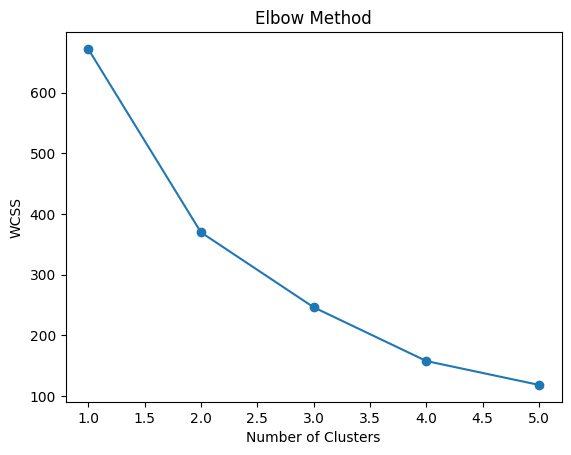

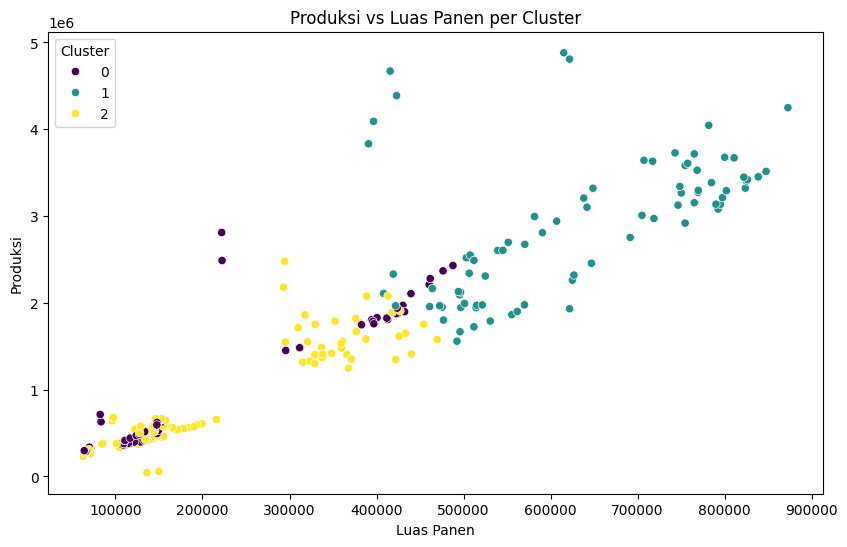

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalisasi data untuk clustering
scaler_cluster = StandardScaler()
X_cluster = scaler_cluster.fit_transform(df[['Luas Panen', 'Curah hujan', 'Produksi']])

# Optimal number of clusters dengan Elbow Method
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 6), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Pilih 3 cluster berdasarkan elbow plot
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)

# Visualisasi cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Luas Panen', y='Produksi', hue='Cluster', palette='viridis')
plt.title('Produksi vs Luas Panen per Cluster')
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_percentage_error

models = {}
scaler_dict = {}
results = []

for cluster in df['Cluster'].unique():
    # Filter data per cluster
    cluster_data = df[df['Cluster'] == cluster]

    # Persiapan data
    X = cluster_data[['Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata']]
    y = cluster_data['Produksi']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Simpan scaler untuk prediksi
    scaler_dict[cluster] = scaler

    # Latih model
    model = Ridge(alpha=1.0)
    model.fit(X_train_scaled, y_train)
    models[cluster] = model

    # Evaluasi
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100

    results.append({
        'Cluster': cluster,
        'Samples': len(cluster_data),
        'R2': r2,
        'MAPE': mape
    })

# Tampilkan hasil
results_df = pd.DataFrame(results)
print(results_df)

   Cluster  Samples        R2       MAPE
0        2       92  0.749904  15.120821
1        1       81  0.310097  19.457933
2        0       51  0.823451  32.514452


In [ ]:
# Bandingkan dengan model global
global_model = Ridge(alpha=1.0)
X_global = df[['Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata']]
y_global = df['Produksi']

X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_global, y_global, test_size=0.2, random_state=42)
global_scaler = StandardScaler()
X_train_g_scaled = global_scaler.fit_transform(X_train_g)
X_test_g_scaled = global_scaler.transform(X_test_g)

global_model.fit(X_train_g_scaled, y_train_g)
y_pred_g = global_model.predict(X_test_g_scaled)

print("\nPerbandingan Performa:")
print(f"Global Model - R2: {r2_score(y_test_g, y_pred_g):.3f}, MAPE: {mean_absolute_percentage_error(y_test_g, y_pred_g)*100:.1f}%")
print(f"Cluster Models - Avg R2: {results_df['R2'].mean():.3f}, Avg MAPE: {results_df['MAPE'].mean():.1f}%")


Perbandingan Performa:
Global Model - R2: 0.870, MAPE: 46.6%
Cluster Models - Avg R2: 0.628, Avg MAPE: 22.4%


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Contoh data prediksi dan aktual (ganti dengan data Anda)
y_true = [500000, 800000, 1200000, 950000]  # Nilai aktual
y_pred = [450000, 850000, 1100000, 900000]   # Nilai prediksi

# Hitung metrik
r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred) * 100  # Konversi ke persen

# Tampilkan hasil persis seperti yang diminta
print(f"R2 Score: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape} %")

R2 Score: 0.9318734793187348
RMSE: 66143.78277661477
MAE: 62500.0
MAPE: 7.4616228070175445 %
